In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Deep Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Visualization Settings
sns.set(style="whitegrid")


In [2]:
# Load Dataset
file_path = "IndianWeatherRepository.csv" 
weather_data = pd.read_csv(file_path)

# Convert Timestamp to Datetime
weather_data['last_updated'] = pd.to_datetime(weather_data['last_updated'], format='%d-%m-%Y %H:%M')

# Sort by Region and Timestamp
weather_data_sorted = weather_data.sort_values(by=['region', 'last_updated'])

# Extract Relevant Features
columns_of_interest = [
    'temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Ozone'
]
weather_data_filtered = weather_data_sorted[['region', 'last_updated'] + columns_of_interest]

# Group by Region
grouped_data = weather_data_filtered.groupby('region')
unique_regions = weather_data_filtered['region'].unique()


In [3]:
def split_data_by_region(grouped_data):
    train_data = {}
    test_data = {}
    for region, data in grouped_data:
        # Select Features and Target
        features = data[columns_of_interest].dropna()
        target = data['temperature_celsius'].dropna()
        
        # Normalize Features
        scaler = MinMaxScaler()
        features_scaled = scaler.fit_transform(features)
        
        # Split into Training and Testing
        X_train, X_test, y_train, y_test = train_test_split(
            features_scaled, target, test_size=0.2, shuffle=False
        )
        train_data[region] = (X_train, y_train)
        test_data[region] = (X_test, y_test)
    return train_data, test_data

# Perform Splitting
train_data_by_region, test_data_by_region = split_data_by_region(grouped_data)


In [4]:
def train_lstm_model(region_name, train_data, test_data):
    X_train, y_train = train_data
    X_test, y_test = test_data
    
    # Reshape for LSTM
    X_train = np.expand_dims(X_train, axis=1)
    X_test = np.expand_dims(X_test, axis=1)
    
    # Define LSTM Model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
    # Train Model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    return model, history, (X_test, y_test)

# Example: Train for Andhra Pradesh
region_example = 'Andhra Pradesh'
model_ap, history_ap, test_data_ap = train_lstm_model(
    region_example, train_data_by_region[region_example], test_data_by_region[region_example]
)


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 463.6489 - mae: 21.1894 - val_loss: 71.0087 - val_mae: 7.3692
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33.0011 - mae: 4.5913 - val_loss: 47.5935 - val_mae: 5.8268
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8738 - mae: 3.7412 - val_loss: 26.4616 - val_mae: 4.1812
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8676 - mae: 3.1991 - val_loss: 13.3353 - val_mae: 2.8728
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1765 - mae: 2.8935 - val_loss: 9.6282 - val_mae: 2.5150
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7625 - mae: 2.8303 - val_loss: 3.7444 - val_mae: 1.4508
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7971 - mae: 2.7270 - val_loss: 2.5389 - val_mae: 1.2157
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.0512 - mae: 2.6420 - val_loss: 1.4505 - val_mae: 0.9328
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s

In [5]:
# Train models for all regions
models_by_region = {}
history_by_region = {}
test_data_by_region_processed = {}

print("Training models for all regions...")
for region in unique_regions:
    print(f"Training for {region}...")
    model, history, test_data = train_lstm_model(
        region, train_data_by_region[region], test_data_by_region[region]
    )
    models_by_region[region] = model
    history_by_region[region] = history
    test_data_by_region_processed[region] = test_data

print("Training complete for all regions!")


Training models for all regions...
Training for Andaman and Nicobar Islands...
Epoch 1/20


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 741.1162 - mae: 27.1860 - val_loss: 767.9980 - val_mae: 27.6996
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 739.9381 - mae: 27.1594 - val_loss: 765.1936 - val_mae: 27.6487
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 729.8531 - mae: 26.9474 - val_loss: 762.4037 - val_mae: 27.5981
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 726.3643 - mae: 26.8625 - val_loss: 759.1133 - val_mae: 27.5383
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 728.4590 - mae: 26.9149 - val_loss: 755.0889 - val_mae: 27.4649
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 720.7383 - mae: 26.7933 - val_loss: 750.1312 - val_mae: 27.3742
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 713.1849 - mae: 26.6484 - val_loss: 743.9065 - val_mae: 27.2598
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 714.5424 - mae: 26.6719 - val_loss: 736.0142 - val_mae: 27.1140
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 477.4986 - mae: 21.6054 - val_loss: 148.5844 - val_mae: 11.5657
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.6438 - mae: 5.3925 - val_loss: 46.6606 - val_mae: 5.7197
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4574 - mae: 4.3284 - val_loss: 35.0934 - val_mae: 4.9457
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5635 - mae: 3.7693 - val_loss: 21.7950 - val_mae: 3.8304
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7035 - mae: 3.5377 - val_loss: 15.3606 - val_mae: 3.2605
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9064 - mae: 3.3607 - val_loss: 8.0808 - val_mae: 2.2955
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3465 - mae: 3.3827 - val_loss: 5.5164 - val_mae: 1.9540
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7759 - mae: 3.2478 - val_loss: 4.4952 - val_mae: 1.8390
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 151.2869 - mae: 9.7975 - val_loss: 111.3268 - val_mae: 8.9327
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 146.6749 - mae: 9.5854 - val_loss: 109.5635 - val_mae: 8.8415
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132.0684 - mae: 8.9720 - val_loss: 107.0789 - val_mae: 8.7135
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139.0745 - mae: 9.3599 - val_loss: 103.4690 - val_mae: 8.5254
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132.0331 - mae: 8.9184 - val_loss: 98.1123 - val_mae: 8.2428
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 134.1113 - mae: 8.9884 - val_loss: 90.3488 - val_mae: 7.8308
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114.4939 - mae: 8.2768 - val_loss: 80.0545 - val_mae: 7.2923
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.8442 - mae: 8.2454 - val_loss: 67.1473 - val_mae: 6.5972
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 363.8351 - mae: 18.5331 - val_loss: 191.4027 - val_mae: 13.5294
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.5712 - mae: 6.9717 - val_loss: 16.3723 - val_mae: 3.2745
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5214 - mae: 2.9774 - val_loss: 16.5357 - val_mae: 3.3380
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9658 - mae: 2.7244 - val_loss: 15.8626 - val_mae: 3.3072
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9458 - mae: 2.6274 - val_loss: 13.2830 - val_mae: 3.0321
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4235 - mae: 2.4080 - val_loss: 10.6732 - val_mae: 2.7148
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1348 - mae: 2.2480 - val_loss: 7.3489 - val_mae: 2.2300
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9801 - mae: 2.2127 - val_loss: 7.4959 - val_mae: 2.2488
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 372.2968 - mae: 18.3291 - val_loss: 43.0594 - val_mae: 5.5104
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.9526 - mae: 4.4811 - val_loss: 33.1257 - val_mae: 4.8454
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.8204 - mae: 3.4564 - val_loss: 27.0932 - val_mae: 4.4865
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7695 - mae: 2.9109 - val_loss: 17.2428 - val_mae: 3.5921
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1383 - mae: 2.5877 - val_loss: 12.5005 - val_mae: 3.0589
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5882 - mae: 2.4336 - val_loss: 6.0737 - val_mae: 2.0124
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1744 - mae: 2.3422 - val_loss: 5.6614 - val_mae: 1.9789
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5839 - mae: 2.2741 - val_loss: 4.7244 - val_mae: 1.8235
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 274.8651 - mae: 15.6797 - val_loss: 349.6768 - val_mae: 18.1965
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 289.6185 - mae: 16.0543 - val_loss: 347.8130 - val_mae: 18.1463
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296.1797 - mae: 16.2904 - val_loss: 345.5202 - val_mae: 18.0837
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 273.8492 - mae: 15.6729 - val_loss: 342.5789 - val_mae: 18.0030
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285.4232 - mae: 15.9657 - val_loss: 338.8747 - val_mae: 17.9011
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 266.1273 - mae: 15.4041 - val_loss: 334.3220 - val_mae: 17.7751
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 268.7750 - mae: 15.4915 - val_loss: 328.6530 - val_mae: 17.6170
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 270.4885 - mae: 15.5426 - val_loss: 321.6723 - val_mae: 17.4205
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 352.8940 - mae: 18.3616 - val_loss: 201.2819 - val_mae: 13.4471
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7809 - mae: 4.1540 - val_loss: 73.9495 - val_mae: 7.6909
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.4491 - mae: 3.1353 - val_loss: 60.1528 - val_mae: 6.9538
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4062 - mae: 2.7593 - val_loss: 45.9433 - val_mae: 6.1139
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0543 - mae: 2.5133 - val_loss: 27.0800 - val_mae: 4.6626
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2299 - mae: 2.2775 - val_loss: 13.5106 - val_mae: 3.2008
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1135 - mae: 2.2437 - val_loss: 11.5949 - val_mae: 2.9627
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4774 - mae: 2.1655 - val_loss: 8.8921 - val_mae: 2.5535
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 566.4027 - mae: 23.7318 - val_loss: 647.5647 - val_mae: 25.3798
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 562.3275 - mae: 23.6496 - val_loss: 645.0829 - val_mae: 25.3309
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 570.2730 - mae: 23.8176 - val_loss: 642.2183 - val_mae: 25.2746
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 567.0119 - mae: 23.7490 - val_loss: 638.8506 - val_mae: 25.2081
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 558.7831 - mae: 23.5722 - val_loss: 634.8393 - val_mae: 25.1286
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 560.8779 - mae: 23.6172 - val_loss: 629.9770 - val_mae: 25.0320
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 552.8795 - mae: 23.4552 - val_loss: 624.0367 - val_mae: 24.9136
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 550.6099 - mae: 23.4023 - val_loss: 616.7810 - val_mae: 24.7681
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 568.2364 - mae: 23.7326 - val_loss: 618.8829 - val_mae: 24.7819
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 564.8635 - mae: 23.6701 - val_loss: 613.4335 - val_mae: 24.6723
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 564.4711 - mae: 23.6523 - val_loss: 605.6487 - val_mae: 24.5149
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 555.5852 - mae: 23.4699 - val_loss: 594.3306 - val_mae: 24.2843
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 534.0590 - mae: 23.0063 - val_loss: 577.9805 - val_mae: 23.9475
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 528.0143 - mae: 22.8803 - val_loss: 554.1539 - val_mae: 23.4481
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 492.7644 - mae: 22.0932 - val_loss: 520.7202 - val_mae: 22.7289
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 468.7055 - mae: 21.5576 - val_loss: 474.9324 - val_mae: 21.7051
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 376.9944 - mae: 18.2891 - val_loss: 517.5270 - val_mae: 22.3398
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 360.2946 - mae: 17.9189 - val_loss: 512.5043 - val_mae: 22.2282
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 375.9297 - mae: 18.2747 - val_loss: 505.2678 - val_mae: 22.0663
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 367.5469 - mae: 18.0443 - val_loss: 494.5841 - val_mae: 21.8252
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 357.7607 - mae: 17.7285 - val_loss: 478.6360 - val_mae: 21.4608
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 350.3866 - mae: 17.5882 - val_loss: 455.7417 - val_mae: 20.9269
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308.1270 - mae: 16.4388 - val_loss: 424.2072 - val_mae: 20.1681
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 272.4208 - mae: 15.3054 - val_loss: 382.5652 - val_mae: 19.1188
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 634.5426 - mae: 25.1573 - val_loss: 652.0461 - val_mae: 25.5134
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 625.8062 - mae: 24.9807 - val_loss: 646.6442 - val_mae: 25.4074
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 626.8482 - mae: 25.0036 - val_loss: 638.5469 - val_mae: 25.2476
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 618.0381 - mae: 24.8276 - val_loss: 625.6716 - val_mae: 24.9916
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 602.1342 - mae: 24.5059 - val_loss: 605.9427 - val_mae: 24.5942
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 579.1733 - mae: 24.0329 - val_loss: 576.4835 - val_mae: 23.9885
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 556.7523 - mae: 23.5618 - val_loss: 534.1582 - val_mae: 23.0902
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 509.5502 - mae: 22.5340 - val_loss: 475.8371 - val_mae: 21.7909
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 506.6879 - mae: 22.2421 - val_loss: 145.8688 - val_mae: 11.4677
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.4942 - mae: 5.3634 - val_loss: 31.5892 - val_mae: 4.7299
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0875 - mae: 3.6804 - val_loss: 26.6863 - val_mae: 4.3753
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1424 - mae: 3.2864 - val_loss: 20.1665 - val_mae: 3.8264
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3319 - mae: 3.0269 - val_loss: 14.0915 - val_mae: 3.2037
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2910 - mae: 2.8095 - val_loss: 5.9309 - val_mae: 2.0914
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8566 - mae: 2.6422 - val_loss: 3.9496 - val_mae: 1.6762
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1528 - mae: 2.5308 - val_loss: 2.6585 - val_mae: 1.3406
Epoch 9/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 357.6812 - mae: 17.8562 - val_loss: 238.0385 - val_mae: 14.7442
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.7977 - mae: 7.9545 - val_loss: 22.7892 - val_mae: 3.9008
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.7153 - mae: 3.9871 - val_loss: 8.9449 - val_mae: 2.3738
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0893 - mae: 2.8138 - val_loss: 1.4453 - val_mae: 0.9196
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9488 - mae: 2.1699 - val_loss: 0.9060 - val_mae: 0.8013
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3935 - mae: 2.0973 - val_loss: 0.5256 - val_mae: 0.5387
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8958 - mae: 2.0250 - val_loss: 0.4306 - val_mae: 0.4770
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0545 - mae: 2.0356 - val_loss: 0.4962 - val_mae: 0.5705
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 129.8183 - mae: 10.2492 - val_loss: 131.7670 - val_mae: 10.5374
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.8047 - mae: 10.0396 - val_loss: 119.6151 - val_mae: 9.9715
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.2211 - mae: 9.3112 - val_loss: 91.3688 - val_mae: 8.5547
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.8364 - mae: 7.5754 - val_loss: 47.7125 - val_mae: 5.8300
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7973 - mae: 4.6729 - val_loss: 21.9896 - val_mae: 3.7733
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3184 - mae: 3.4396 - val_loss: 20.6293 - val_mae: 3.6715
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.5716 - mae: 3.2186 - val_loss: 20.3959 - val_mae: 3.6478
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5905 - mae: 3.3557 - val_loss: 19.8040 - val_mae: 3.6015
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 117.8390 - mae: 8.6925 - val_loss: 102.9203 - val_mae: 7.4896
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.8938 - mae: 6.3526 - val_loss: 86.0052 - val_mae: 6.7229
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.0896 - mae: 5.6118 - val_loss: 52.5824 - val_mae: 5.0387
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.0359 - mae: 4.5234 - val_loss: 37.9356 - val_mae: 4.1767
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.1123 - mae: 3.5501 - val_loss: 33.0308 - val_mae: 4.1377
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9110 - mae: 3.0942 - val_loss: 24.9869 - val_mae: 3.5256
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2859 - mae: 2.6095 - val_loss: 17.5394 - val_mae: 2.7524
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4471 - mae: 2.3735 - val_loss: 13.1568 - val_mae: 2.3235
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 372.8896 - mae: 18.7571 - val_loss: 415.2717 - val_mae: 19.9390
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167.3316 - mae: 11.6239 - val_loss: 41.0522 - val_mae: 5.3180
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.3718 - mae: 3.7504 - val_loss: 38.9365 - val_mae: 5.2176
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6299 - mae: 3.4959 - val_loss: 38.5603 - val_mae: 5.2493
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3721 - mae: 3.1037 - val_loss: 31.7511 - val_mae: 4.7833
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2560 - mae: 2.8757 - val_loss: 22.6685 - val_mae: 4.0318
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3168 - mae: 2.6813 - val_loss: 15.3717 - val_mae: 3.3090
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3224 - mae: 2.4131 - val_loss: 9.5568 - val_mae: 2.5549
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.738

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 448.8537 - mae: 20.9774 - val_loss: 191.7707 - val_mae: 13.3321
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.9416 - mae: 5.3205 - val_loss: 37.7182 - val_mae: 5.0664
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9810 - mae: 3.5299 - val_loss: 27.9647 - val_mae: 4.3260
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5130 - mae: 3.1230 - val_loss: 18.0641 - val_mae: 3.5041
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1896 - mae: 2.7812 - val_loss: 9.8468 - val_mae: 2.6364
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1288 - mae: 2.5259 - val_loss: 2.2422 - val_mae: 1.2177
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0153 - mae: 2.4664 - val_loss: 1.1477 - val_mae: 0.8728
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5808 - mae: 2.3245 - val_loss: 0.6203 - val_mae: 0.6264
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 609.9219 - mae: 24.6168 - val_loss: 684.5737 - val_mae: 26.0944
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 441.4879 - mae: 20.7397 - val_loss: 141.2758 - val_mae: 11.6169
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.8541 - mae: 6.0510 - val_loss: 22.2276 - val_mae: 4.0723
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.8827 - mae: 4.2563 - val_loss: 19.1792 - val_mae: 3.7651
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3199 - mae: 4.2365 - val_loss: 19.4044 - val_mae: 3.8268
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5247 - mae: 3.8929 - val_loss: 17.1652 - val_mae: 3.5986
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6229 - mae: 3.7304 - val_loss: 14.0702 - val_mae: 3.2378
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3351 - mae: 3.4801 - val_loss: 13.4546 - val_mae: 3.1961
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 775.3577 - mae: 27.8400 - val_loss: 794.5660 - val_mae: 28.1841
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 771.2112 - mae: 27.7658 - val_loss: 791.6433 - val_mae: 28.1322
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 769.4302 - mae: 27.7333 - val_loss: 788.2408 - val_mae: 28.0717
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 766.5229 - mae: 27.6812 - val_loss: 783.9561 - val_mae: 27.9953
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 763.7964 - mae: 27.6320 - val_loss: 778.6635 - val_mae: 27.9007
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 756.7836 - mae: 27.5044 - val_loss: 772.1088 - val_mae: 27.7831
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 753.1243 - mae: 27.4387 - val_loss: 763.8733 - val_mae: 27.6346
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 744.0689 - mae: 27.2728 - val_loss: 753.6012 - val_mae: 27.4482
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 299.9222 - mae: 16.1978 - val_loss: 62.5585 - val_mae: 6.9070
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.4541 - mae: 3.6658 - val_loss: 29.1406 - val_mae: 4.6982
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.2049 - mae: 2.7802 - val_loss: 12.7311 - val_mae: 2.9354
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.5450 - mae: 2.4505 - val_loss: 11.6338 - val_mae: 2.8474
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3589 - mae: 2.4361 - val_loss: 7.5713 - val_mae: 2.2228
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.8617 - mae: 2.3371 - val_loss: 6.3062 - val_mae: 1.9922
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.9664 - mae: 2.3582 - val_loss: 6.5942 - val_mae: 2.1825
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.9963 - mae: 2.3390 - val_loss: 3.7792 - val_mae: 1.5802
Epoch 9/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 462.5840 - mae: 21.1794 - val_loss: 114.6446 - val_mae: 9.9269
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.9482 - mae: 4.1596 - val_loss: 52.1196 - val_mae: 6.3521
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.7557 - mae: 3.8102 - val_loss: 31.6769 - val_mae: 4.8902
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.9478 - mae: 3.2460 - val_loss: 14.4076 - val_mae: 3.2363
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.9012 - mae: 2.9692 - val_loss: 5.2798 - val_mae: 1.8576
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.3686 - mae: 2.7871 - val_loss: 4.2122 - val_mae: 1.6580
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.2274 - mae: 2.7876 - val_loss: 3.1184 - val_mae: 1.4084
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.9393 - mae: 2.7477 - val_loss: 2.6599 - val_mae: 1.3370
Epoch 9/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 174.9919 - mae: 12.2666 - val_loss: 197.7595 - val_mae: 13.6404
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.0398 - mae: 11.4671 - val_loss: 120.4761 - val_mae: 10.4412
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.8413 - mae: 7.4405 - val_loss: 18.2501 - val_mae: 3.3424
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.7554 - mae: 4.5930 - val_loss: 13.0683 - val_mae: 2.8521
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5076 - mae: 3.9997 - val_loss: 12.6593 - val_mae: 2.8014
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.4844 - mae: 3.3240 - val_loss: 14.7072 - val_mae: 3.0788
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6008 - mae: 3.0897 - val_loss: 18.3691 - val_mae: 3.5567
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0035 - mae: 2.6951 - val_loss: 20.3921 - val_mae: 3.8033
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 279.7567 - mae: 16.0129 - val_loss: 284.1269 - val_mae: 16.5552
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250.1386 - mae: 15.0916 - val_loss: 241.2557 - val_mae: 15.2176
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210.9199 - mae: 13.6338 - val_loss: 127.2251 - val_mae: 10.8479
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.3103 - mae: 9.0772 - val_loss: 21.6134 - val_mae: 3.7762
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.2954 - mae: 5.1300 - val_loss: 16.8316 - val_mae: 3.1992
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.1250 - mae: 4.2550 - val_loss: 13.4616 - val_mae: 2.9020
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.3917 - mae: 3.8527 - val_loss: 13.0343 - val_mae: 2.9320
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9493 - mae: 3.4276 - val_loss: 13.8636 - val_mae: 3.1373
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 250.4073 - mae: 14.5767 - val_loss: 187.2113 - val_mae: 13.2546
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 222.3148 - mae: 13.7085 - val_loss: 147.6700 - val_mae: 11.6820
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184.6409 - mae: 12.0905 - val_loss: 63.6416 - val_mae: 7.2930
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.1494 - mae: 7.4873 - val_loss: 11.1471 - val_mae: 2.6350
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.7325 - mae: 5.1522 - val_loss: 14.9925 - val_mae: 3.1462
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.6853 - mae: 4.8920 - val_loss: 9.5526 - val_mae: 2.4421
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.3296 - mae: 4.5582 - val_loss: 7.9937 - val_mae: 2.2281
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.0623 - mae: 3.9644 - val_loss: 7.1321 - val_mae: 2.0924
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 414.2592 - mae: 19.9163 - val_loss: 142.1236 - val_mae: 11.3174
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.6089 - mae: 4.7696 - val_loss: 40.9622 - val_mae: 5.0400
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.2042 - mae: 3.4537 - val_loss: 29.3483 - val_mae: 4.0484
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6136 - mae: 3.1465 - val_loss: 21.5881 - val_mae: 3.3712
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.4407 - mae: 2.8086 - val_loss: 16.4684 - val_mae: 2.8995
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2289 - mae: 2.7669 - val_loss: 13.8202 - val_mae: 2.6696
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2903 - mae: 2.6613 - val_loss: 8.7905 - val_mae: 2.0641
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5829 - mae: 2.5862 - val_loss: 6.8513 - val_mae: 1.8100
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 652.3950 - mae: 25.5128 - val_loss: 688.1513 - val_mae: 26.2172
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 647.1519 - mae: 25.4063 - val_loss: 682.2511 - val_mae: 26.1044
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 642.7133 - mae: 25.3210 - val_loss: 673.0389 - val_mae: 25.9274
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 627.2073 - mae: 25.0147 - val_loss: 658.5515 - val_mae: 25.6464
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 612.6338 - mae: 24.7227 - val_loss: 636.1356 - val_mae: 25.2052
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 589.4812 - mae: 24.2435 - val_loss: 602.8437 - val_mae: 24.5350
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 551.4769 - mae: 23.4430 - val_loss: 555.1678 - val_mae: 23.5412
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 500.2970 - mae: 22.3166 - val_loss: 490.4021 - val_mae: 22.1177
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 308.7634 - mae: 16.4113 - val_loss: 213.1781 - val_mae: 13.8303
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.7632 - mae: 8.7830 - val_loss: 27.2241 - val_mae: 4.1410
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.8754 - mae: 4.6956 - val_loss: 16.0900 - val_mae: 3.1517
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.7135 - mae: 3.4374 - val_loss: 7.1837 - val_mae: 2.0963
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3562 - mae: 2.6248 - val_loss: 2.6505 - val_mae: 1.3077
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1089 - mae: 2.2219 - val_loss: 1.4174 - val_mae: 0.9579
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4615 - mae: 2.1275 - val_loss: 0.8691 - val_mae: 0.7173
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3239 - mae: 1.9680 - val_loss: 0.6346 - val_mae: 0.5997
Epoch 9/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 351.4098 - mae: 17.5456 - val_loss: 46.4520 - val_mae: 5.6950
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28.1124 - mae: 4.2493 - val_loss: 26.0751 - val_mae: 4.2407
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.7376 - mae: 3.3388 - val_loss: 12.3206 - val_mae: 2.8945
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.1774 - mae: 2.6004 - val_loss: 4.8799 - val_mae: 1.7385
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1239 - mae: 2.3563 - val_loss: 2.3888 - val_mae: 1.1699
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3875 - mae: 2.2690 - val_loss: 2.4267 - val_mae: 1.2583
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6474 - mae: 2.1579 - val_loss: 1.3556 - val_mae: 0.9201
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3635 - mae: 2.1027 - val_loss: 0.9454 - val_mae: 0.8154
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 544.4772 - mae: 23.0436 - val_loss: 46.1876 - val_mae: 5.9761
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.5044 - mae: 4.3372 - val_loss: 16.4025 - val_mae: 3.3041
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.4044 - mae: 3.5298 - val_loss: 14.9302 - val_mae: 3.2046
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7137 - mae: 3.0485 - val_loss: 9.3603 - val_mae: 2.4531
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6075 - mae: 2.9296 - val_loss: 8.4986 - val_mae: 2.3390
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2750 - mae: 2.8111 - val_loss: 9.9431 - val_mae: 2.7058
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9111 - mae: 2.7544 - val_loss: 7.5864 - val_mae: 2.3196
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3482 - mae: 2.8057 - val_loss: 6.5732 - val_mae: 2.1779
Epoch 9/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 359.2570 - mae: 18.4641 - val_loss: 490.3918 - val_mae: 21.8345
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 353.7226 - mae: 18.2588 - val_loss: 479.8423 - val_mae: 21.5953
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 332.4095 - mae: 17.6903 - val_loss: 461.3795 - val_mae: 21.1724
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315.3640 - mae: 17.2568 - val_loss: 432.4691 - val_mae: 20.4942
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 296.4132 - mae: 16.6750 - val_loss: 387.8750 - val_mae: 19.4026
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 251.3536 - mae: 15.2856 - val_loss: 324.1865 - val_mae: 17.7272
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 204.5239 - mae: 13.6461 - val_loss: 241.8956 - val_mae: 15.2871
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 140.2221 - mae: 11.0250 - val_loss: 151.9453 - val_mae: 12.0431
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 263.2145 - mae: 14.3620 - val_loss: 32.7831 - val_mae: 4.7900
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.4075 - mae: 3.1714 - val_loss: 6.5584 - val_mae: 2.0036
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.9831 - mae: 2.3356 - val_loss: 4.8413 - val_mae: 1.6850
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7468 - mae: 2.3186 - val_loss: 3.5467 - val_mae: 1.3854
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3373 - mae: 2.2131 - val_loss: 2.2975 - val_mae: 1.0959
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.9251 - mae: 2.1674 - val_loss: 4.1365 - val_mae: 1.7429
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5198 - mae: 2.1181 - val_loss: 2.0936 - val_mae: 1.2060
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3542 - mae: 2.0983 - val_loss: 1.6723 - val_mae: 1.1190
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 153.6494 - mae: 10.6313 - val_loss: 166.8640 - val_mae: 11.5892
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.0221 - mae: 9.4832 - val_loss: 86.3486 - val_mae: 7.9511
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.6943 - mae: 6.1998 - val_loss: 48.4988 - val_mae: 5.6324
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.5038 - mae: 5.1116 - val_loss: 43.7755 - val_mae: 5.4287
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.7000 - mae: 4.2300 - val_loss: 41.0189 - val_mae: 5.2829
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.6015 - mae: 3.4566 - val_loss: 29.0104 - val_mae: 4.4098
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.4758 - mae: 2.9663 - val_loss: 24.0948 - val_mae: 4.0189
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2408 - mae: 2.6440 - val_loss: 19.2317 - val_mae: 3.5794
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.43

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 435.5827 - mae: 20.3452 - val_loss: 377.7164 - val_mae: 19.0897
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.5966 - mae: 11.3753 - val_loss: 23.0246 - val_mae: 3.8483
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.8984 - mae: 3.9407 - val_loss: 20.9396 - val_mae: 3.6589
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2081 - mae: 3.8517 - val_loss: 18.3097 - val_mae: 3.4215
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1612 - mae: 3.6363 - val_loss: 15.8627 - val_mae: 3.1388
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1215 - mae: 3.3597 - val_loss: 12.6488 - val_mae: 2.7983
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6872 - mae: 3.0318 - val_loss: 9.5302 - val_mae: 2.4069
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3320 - mae: 3.0130 - val_loss: 6.0665 - val_mae: 1.7856
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/


Available regions:
1. Andaman and Nicobar Islands
2. Andhra Pradesh
3. Arunachal Pradesh
4. Assam
5. Bihar
6. Chandigarh
7. Chhattisgarh
8. Dadra and Nagar Haveli
9. Daman and Diu
10. Delhi
11. Goa
12. Gujarat
13. Haryana
14. Himachal Pradesh
15. Jammu and Kashmir
16. Jharkhand
17. Karnataka
18. Kerala
19. Lakshadweep
20. Madhya Pradesh
21. Maharashtra
22. Manipur
23. Mizoram
24. Nagaland
25. Orissa
26. Puducherry
27. Punjab
28. Rajasthan
29. Tamil Nadu
30. Tripura
31. Uttar Pradesh
32. Uttarakhand
33. West Bengal



Enter the number corresponding to the region you want to analyze (or 0 to exit):  18



You selected: Kerala


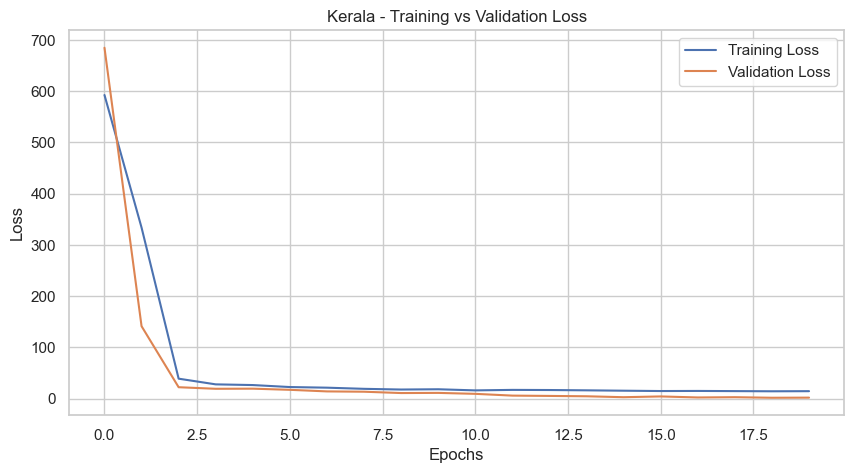

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


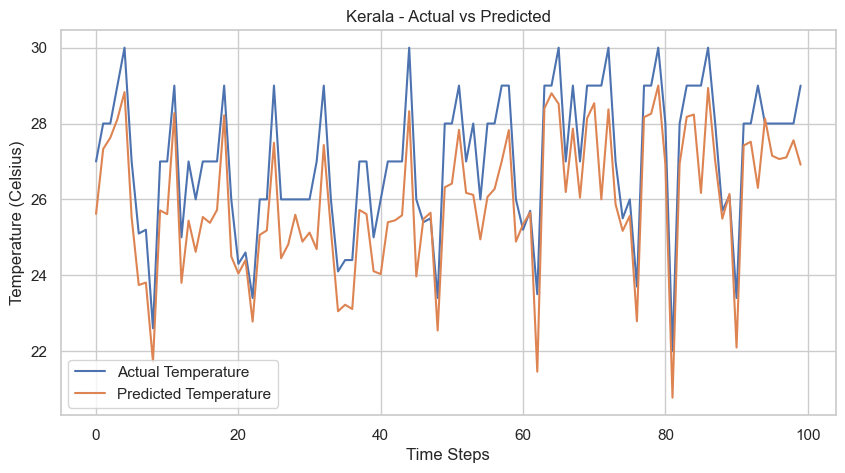


Available regions:
1. Andaman and Nicobar Islands
2. Andhra Pradesh
3. Arunachal Pradesh
4. Assam
5. Bihar
6. Chandigarh
7. Chhattisgarh
8. Dadra and Nagar Haveli
9. Daman and Diu
10. Delhi
11. Goa
12. Gujarat
13. Haryana
14. Himachal Pradesh
15. Jammu and Kashmir
16. Jharkhand
17. Karnataka
18. Kerala
19. Lakshadweep
20. Madhya Pradesh
21. Maharashtra
22. Manipur
23. Mizoram
24. Nagaland
25. Orissa
26. Puducherry
27. Punjab
28. Rajasthan
29. Tamil Nadu
30. Tripura
31. Uttar Pradesh
32. Uttarakhand
33. West Bengal



Enter the number corresponding to the region you want to analyze (or 0 to exit):  0


Exiting...


In [6]:
# Dynamic Region Selection for Visualization
while True:
    print("\nAvailable regions:")
    for idx, region in enumerate(unique_regions):
        print(f"{idx + 1}. {region}")

    # Ask user to select a region
    selected_idx = int(input("\nEnter the number corresponding to the region you want to analyze (or 0 to exit): ")) - 1
    if selected_idx == -1:
        print("Exiting...")
        break

    region_example = unique_regions[selected_idx]
    print(f"\nYou selected: {region_example}")

    # Retrieve trained model and test data
    model = models_by_region[region_example]
    history = history_by_region[region_example]
    X_test, y_test = test_data_by_region_processed[region_example]

    # Visualize Training Results
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{region_example} - Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate and Predict
    predictions = model.predict(X_test)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label='Actual Temperature')
    plt.plot(predictions[:100], label='Predicted Temperature')
    plt.title(f'{region_example} - Actual vs Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Temperature (Celsius)')
    plt.legend()
    plt.show()


In [7]:
print(model.summary())


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,637 (240.77 KB)

 Trainable params: 20,545 (80.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,092 (160.52 KB)

None


Processing region: Andaman and Nicobar Islands...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Processing region: Andhra Pradesh...
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing region: Arunachal Pradesh...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Processing region: Assam...
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Processing region: Bihar...
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing region: Chandigarh...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Processing region: Chhattisgarh...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Processing region: Dadra and Nagar Haveli...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Processing region: Daman and Diu...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Processing region: Delhi...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Processing region: Goa...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Processing region: Gujarat...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Processing region: Haryana...
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Processing region: Himachal Pradesh...
7/7 ━━━━━━━━

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16916\3974716536.py:27: FutureWarning: The provided callable <function mean at 0x0000022CF52E8F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = metrics_df.pivot_table(values='MAE', index='Region', aggfunc=np.mean)


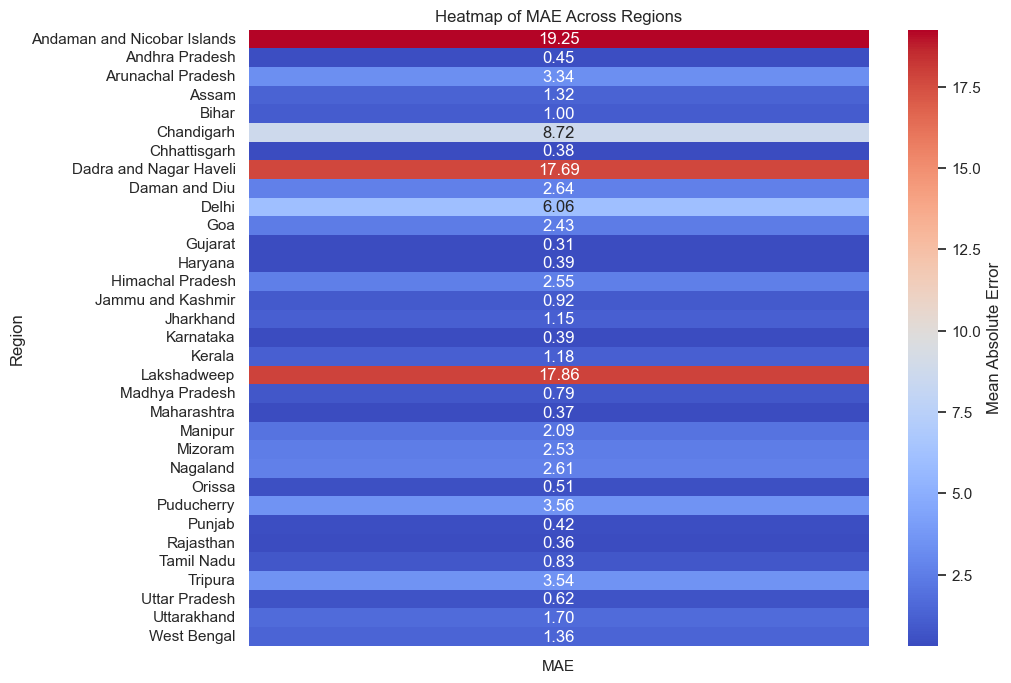

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16916\3974716536.py:35: FutureWarning: The provided callable <function mean at 0x0000022CF52E8F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = metrics_df.pivot_table(values='RMSE', index='Region', aggfunc=np.mean)


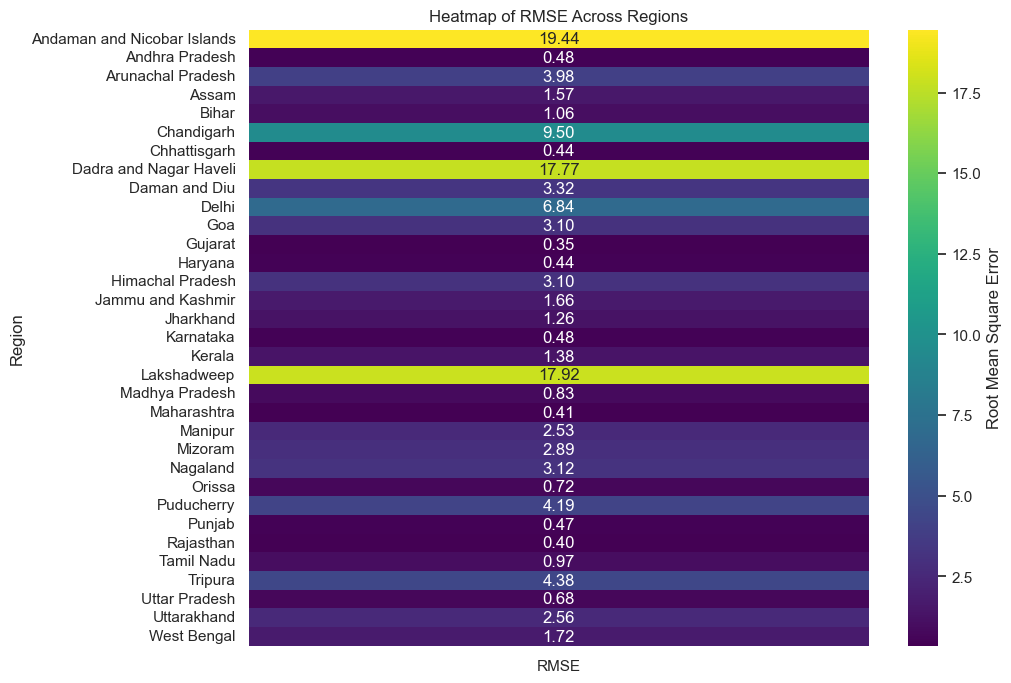

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize a DataFrame to store metrics
metrics_data = []

# Loop through regions to calculate metrics and plot graphs
for region in unique_regions:
    print(f"Processing region: {region}...")
    
    # Retrieve trained model and test data
    model = models_by_region[region]
    history = history_by_region[region]
    X_test, y_test = test_data_by_region_processed[region]

    # Calculate predictions
    predictions = model.predict(X_test).flatten()
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    metrics_data.append({'Region': region, 'MAE': mae, 'RMSE': rmse})
# Convert metrics to DataFrame for heatmap visualization
metrics_df = pd.DataFrame(metrics_data)

# Plot Heatmap for MAE
plt.figure(figsize=(10, 8))
heatmap_data = metrics_df.pivot_table(values='MAE', index='Region', aggfunc=np.mean)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Mean Absolute Error'})
plt.title("Heatmap of MAE Across Regions")
plt.ylabel("Region")
plt.show()

# Plot Heatmap for RMSE
plt.figure(figsize=(10, 8))
heatmap_data = metrics_df.pivot_table(values='RMSE', index='Region', aggfunc=np.mean)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Root Mean Square Error'})
plt.title("Heatmap of RMSE Across Regions")
plt.ylabel("Region")
plt.show()


In [10]:
import shap
shap.initjs()

In [11]:
# Integrating XAI (SHAP and LIME) for region-wise predictions
import shap
import lime
import lime.lime_tabular
import numpy as np
from IPython.display import display

def explain_predictions_with_shap_and_lime(region_name, models_by_region, test_data_by_region_processed, feature_names):
    """
    Explain predictions for a specific region using SHAP and LIME.
    
    Parameters:
    - region_name: Name of the region (e.g., 'Kerala').
    - models_by_region: Dictionary containing trained models for each region.
    - test_data_by_region_processed: Dictionary containing test data for each region.
    - feature_names: List of feature names corresponding to the input data.
    """
    # Retrieve the trained model and test data for the specified region
    model = models_by_region[region_name]
    X_test, y_test = test_data_by_region_processed[region_name]

    # Ensure the input is correctly shaped for the model
    def model_predict(input_data):
        input_data = np.expand_dims(input_data, axis=1)  # Add time-series dimension
        return model.predict(input_data).flatten()

    # --- SHAP EXPLAINER --- #
    print("\n--- SHAP Explanations ---\n")
    # Reshape test data for SHAP KernelExplainer
    X_test_flattened = X_test[:, 0, :]  # Flatten time-series into 2D array

    # Create KernelExplainer
    shap_explainer = shap.KernelExplainer(model_predict, X_test_flattened[:100])  # Use subset for efficiency
    shap_values = shap_explainer.shap_values(X_test_flattened[:5])  # Explain first 5 samples

    # print(shap_explainer, shap_values)
    # Visualize SHAP values for each sample
    for i in range(5):
        print(f"SHAP Explanation for Test Sample {i + 1}:")
        # Generate the force plot
        force_plot = shap.force_plot(
            shap_explainer.expected_value,
            shap_values[i],
            X_test_flattened[i],
            feature_names=feature_names
        )
        # Display the plot
        display(force_plot)

    # # --- LIME EXPLAINER --- #
    # print("\n--- LIME Explanations ---\n")
    # # Create LIME Explainer
    # lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    #     X_test_flattened, 
    #     feature_names=feature_names, 
    #     class_names=["Prediction"], 
    #     discretize_continuous=True
    # )

    # # Explain a single prediction (e.g., first sample)
    # lime_exp = lime_explainer.explain_instance(
    #     X_test_flattened[0], 
    #     model_predict, 
    #     num_features=len(feature_names)
    # )

    # # Display LIME explanation
    # lime_exp.show_in_notebook()
    # print("LIME Explanation:", lime_exp.as_list())

# Example Usage
region_name = "Kerala"  # Replace with your desired region
feature_names = [
    'humidity', 'precip_mm', 'wind_kph', 
    'air_quality_PM2.5', 'air_quality_PM10'
]

# Call the function with appropriate parameters
explain_predictions_with_shap_and_lime(region_name, models_by_region, test_data_by_region_processed, feature_names)



--- SHAP Explanations ---

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
SHAP Explanation for Test Sample 1:


SHAP Explanation for Test Sample 2:


SHAP Explanation for Test Sample 3:


SHAP Explanation for Test Sample 4:


SHAP Explanation for Test Sample 5:
